# Breccia Dike Cooling Model

## Heat transfer during dike cooling

We are interested in modeling heat transfer during the emplacement and subsequent cooling of breccia dikes. We are particularly interested in understanding the timescale for cooling within the dike itself. This problem was dealt with nicely in an article published by Paul T. Delaney of the US Geological Survey:

Delaney, P.T. 1987. Heat transfer during emplacement and cooling of mafic dykes In Mafic dyke swarms. Edited by H.C. Halls and W.F. Fahrig. Geological Association of Canada, Special Paper 34, pp. 31-46.

## An analytical solution to transient heat conduction

Delaney (1987) formulates the problem by idealizing a dike as a tabular plane of infinite extent. Coordinates are based on the position of the dike wall with the $X$-direction being the direction orthogonal to the wall such that negative $X$ values are within the dike and positive $X$ values are in the host rock. The dike has a thickness $T$ and an initial temperature $\Theta_{mi}$ (subscript stands for magma initial). The host rock has an initial temperature $\Theta_{hi}$ and a thermal diffusivity $\kappa_h$.
> Conservation of energy for a motionless material undergoing one-dimensional heat transfer with no chemical reactions is (Carslaw and Jaeger, 1959, Ch. 1; Bird et al., 1960, Ch.10):
\begin{equation}
\rho C\frac{\partial\Theta}{\partial t} = \frac{\partial}{\partial X}k\frac{\partial\Theta}{\partial X}
\end{equation}
This equation states that the heat conducted into a unit volume minus the heat conducted out is equal to the accumulation of heat within the volume. The right-hand side of equation 1 is the gradient in heat flux, which is given by Fourier's Law, $Q = - k\partial\Theta/\partial X$ where $k$ is thermal conductivity; the left-hand side is the rate of accumulation of heat, where pC is heat capacity per unit volume. If k is constant, then:
\begin{equation}
\frac{\partial\Theta}{\partial t} = \kappa\frac{\partial^2\Theta}{\partial X^2}
\end{equation}
Thermal diffusivity, $\kappa = k/(pC)$, measures the ability of a material to conduct heat relative to its ability to accumulate heat.

> Generality and simplicity are gained by introducing non-dimensional temperature $\theta$, distance $x$, and time $\tau$:

> \begin{equation}
\theta = (\Theta-\Theta_{hi})/(\Theta_{mi}-\Theta_{hi})
\end{equation}

> \begin{equation}
x = X/(T/2)
\end{equation}

> \begin{equation}
\tau = t*\kappa_h/(T/2)^2
\end{equation}

Following this introduction, Delaney builds up to presenting the first and simplest whole-time solution. This solution neglects themal property contrasts between the host rock and dike (i.e. $\kappa_m/\kappa_h=1$). These thermal property contrasts can affect the maximum temperatures reached in the host rock and early cooling rates, but the influence is rather small. This whole-time solution is:

> \begin{equation}
\theta = \frac{1}{2}[erf\big(\frac{2+x}{\sqrt{4\tau}}\big)-erf\big(\frac{x}{\sqrt{4\tau}}\big)]
\end{equation}

Delaney also presents numerical solutions that incorporate the effects of the heat of crystallization, magma flow and the temperature dependance of thermal conductivity and diffusivity. In the application that we are exploring here, the cooling of a breccia dike emplaced within an impact crater neither the heat of crystallization nor magma flow apply and therefore the analytical solution using transient heat conduction theory will work well for our analysis. 

## Implementing the whole-time solution

### Define the function dike_cooling()

A function can be defined that returns the temperature at a given time and distance from the contact (within or outside of the dike) for a given initial dike temperature, initial host rock temperature, dike width and thermal diffusivity. This function calculates non-dimensional distance and time and then solves for non-dimensional temperature using the whole-time solution detailed above. The temperature of interest can then be extracted from the non-dimensional temperature using the specified intial temperatures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy import special
%config InlineBackend.figure_formats = {'svg',}
%matplotlib inline

In [2]:
def dike_cooling(t,distance_from_contact,temp_dike,temp_host,dike_width,kn):
    x_nd = distance_from_contact/(dike_width/2)
    tau_nd = t * kn/((dike_width/2.0)**2)
    temp_nd =  0.5 * (special.erf((2+x_nd)/np.sqrt(4*tau_nd)) - special.erf(x_nd/np.sqrt(4*tau_nd)))
    temp = temp_nd*(temp_dike-temp_host) + temp_host
    return temp

### Input parameters

In [5]:
temp_dike = 900.0 #in Celcius
temp_host = 30.0 #in Celcius
dike_width = 50 #in meters
kn = 7.35e-7 #thermal diffusivity (m^2/s)

### Plot temperature vs distance at a number of times following dike emplacement

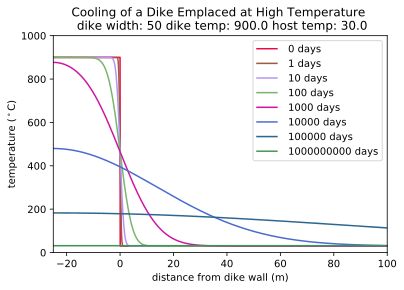

In [18]:
for time in [1,1*60*60*24,10*60*60*24,100*60*60*24,1000*60*60*24, 10000*60*60*24, 100000*60*60*24, 1000000000*60*60*24]:

    temp = []
    distance = []
    
    for distance_from_contact in np.arange(-dike_width/2,
                                           dike_width*2,0.01):
        temp_at_distance = dike_cooling(time,distance_from_contact,
                                        temp_dike,temp_host,
                                        dike_width,kn)
        temp.append(temp_at_distance)
        distance.append(distance_from_contact)
    plt.plot(distance,temp,c=np.random.rand(3),
             label=str('% 1.f' %(time/60/60/24)+' days'))
        
plt.xlabel('distance from dike wall (m)')
plt.ylabel('temperature ($^\circ$C)')
plt.ylim((0,temp_dike+100))
plt.xlim((-dike_width/2,dike_width*2))
plt.legend()
plt.title('Cooling of a Dike Emplaced at High Temperature \n dike width: '+str(dike_width)+' dike temp: '+str(temp_dike)+' host temp: '+str(temp_host))
# plt.savefig("Code_output/multitime_cooling.pdf")
plt.show()

### Temperature dependence of thermal diffusivity

The above analysis does not incorporate the temperature-dependence of thermal diffusivity explored by Delaney (1987) in some detail. Laser flash-analysis has enabled advances in measurements of thermal diffusivity at elevated temperature since the work of Delaney (1987). Estimated of thermal diffusivity from schist, granite and rhyolite were published by:

Whittington A. G., Hofmeister A. M., Nabelek P. I. (2009) Temperature-dependent thermal diffusivity of the Earth's crust and implications for magmatism. Nature 458:319–321

These data were similar between the three rock types and the following empirical fits were proposed by Whittington et al. (2009) for the temperature dependence of thermal diffusivity (in square millimetres per second) in the continental crust.

\begin{equation}
\kappa_{crust}(T<846K)=567.3/T-0.062
\end{equation}

\begin{equation}
\kappa_{crust}(T>846K)=0.732-0.000135T
\end{equation}

Our temperature range of interest is between the estimated emplacement temperature of 800ºC and the interval over which the majority of magnetite remanence will be blocked (580ºC to 400ºC). There is minimal fluctuations of thermal diffusivity over this temperature range in the empirical fit of Whittington et al. (2009). The code below, plots the Whittington et al. (2009) empirical fit over a range of temperature and calculates an average value over the temperature range of 800ºC to 400ºC for use in the cooling model.

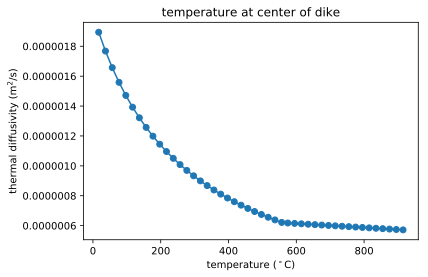

In [6]:
T = []
kappa = []

for temp in range(290,845,20):
    k = 567.3/temp - 0.062
    kappa.append(k*10**-6)
    T.append(temp-273)
for temp in range(848,1200,20):
    k = 0.732 - 0.000135*temp
    kappa.append(k*10**-6)
    T.append(temp-273)  

plt.plot(T,kappa,marker='o')
plt.ylabel('thermal diffusivity (m$^2$/s)')
plt.xlabel('temperature ($^\circ$C)')
plt.title('temperature at center of dike')
plt.show()

The average thermal diffusivity (m$^2$/s) over the range of 400 to 800 degrees C
6.39853102401e-07


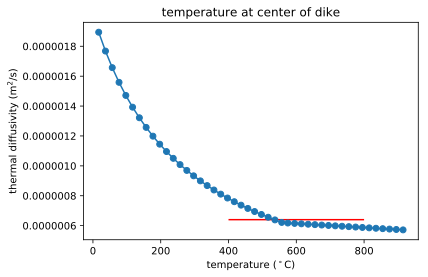

In [7]:
T_for_avg = []
kappa_for_avg = []

for temp in range(400+273,800+273):
    if temp > 846:
        k = 0.732 - 0.000135*temp
        kappa_for_avg.append(k*10**-6)
        T_for_avg.append(temp-273)  
    if temp < 846:
        k = 567.3/temp - 0.062
        kappa_for_avg.append(k*10**-6)
        T_for_avg.append(temp-273)
average_kappa = np.average(kappa_for_avg)
print("The average thermal diffusivity (m$^2$/s) over the range of 400 to 800 degrees C")
print(average_kappa)

plt.plot(T,kappa,marker='o')
plt.hlines(average_kappa,400,800,color='r')
plt.ylabel('thermal diffusivity (m$^2$/s)')
plt.xlabel('temperature ($^\circ$C)')
plt.title('temperature at center of dike')
plt.show()

From this fit we obtain an average thermal diffusivity of $\kappa$ $=$ $6.4$$x$$10$$^-$$^7$ $m$$^2$$/s$ over the temperature range of interest that use for the model.

### Implementing the Model

Here we input the new value we are using for thermal diffusivity. Other parameters such as emplacement temperature, host rock temperature, and dike width are explained above or within the main text.

Because we would like to identify the minimum time over which the impact direction was acquired by a breccia dike after emplacement, we use the thinnest sampled breccia dike site (PI47; 4 cm thick) in the conductive cooling model. Paleomagnetic core samples from PI47 are 2.5 cm in diameter and therefore span most of the breccia dike's width as seen in the photo for the PI47 breccia dike in the paleomagnetic data analysis section. We therefore calculate characteristic cooling curves for both the center of the dike and 0.75 cm from the edge of the dike, since our paleomagnetic data encapsulates this range of positions within the PI47 breccia dike. 

In [8]:
#Input new parameters for PI47 dike (4.0 cm thick)
temp_dike = 800.0 #in Celcius
temp_host = 275.0 #in Celcius
dike_width = .04 #in meters
kn = 6.399e-7 #thermal diffusivity (m^2/s)

/Users/lukefairchild765/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars


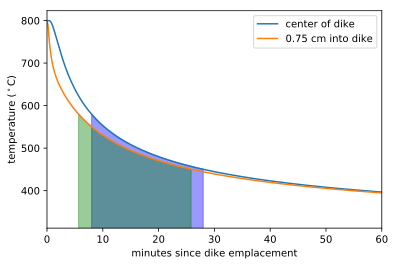

Center of dike cools to 580 in 8.0 minutes
0.75 cm into dike cools to 580 in 5.666666666666667 minutes


In [11]:
distance_from_contact = -dike_width/2.0 #center of dike in meters
time = []
time_hours = []
time_minutes = []
temp = []
temp_1cm = []

for t in range(0,15000,10):
    temp_at_t = dike_cooling(t,distance_from_contact,
                             temp_dike,temp_host,dike_width,kn)
    temp_at_1cm = dike_cooling(t,-0.0075,temp_dike,temp_host,dike_width,kn)
    temp_1cm.append(temp_at_1cm)
    temp.append(temp_at_t)
    time.append(t)
    time_hours.append(t/60.0/60.0)
    time_minutes.append(t/60.0)
    
def find_temp(temp_list, temp_target):
    for i in range(len(temp_list)):
        if temp_list[i] <= float(temp_target):
            return i
        
lvl_580 = find_temp(temp, 580)
lvl_450 = find_temp(temp, 450)

lvl_580_1cm = find_temp(temp_1cm, 580)
lvl_450_1cm = find_temp(temp_1cm, 450)

x_rng = time_minutes[lvl_580:lvl_450]
y_rng = temp[lvl_580:lvl_450]

x_rng_1cm = time_minutes[lvl_580_1cm:lvl_450_1cm]
y_rng_1cm = temp_1cm[lvl_580_1cm:lvl_450_1cm]

vertices_p1 = [(x_rng[0], 0)] + list(zip(x_rng, y_rng)) + [(x_rng[-1], 0)]
vertices_p2 = [(0,0)] + [(0,580)] + [(x_rng[0], y_rng[0])] + [(x_rng[0],0)]

vertices_p1_1cm = [(x_rng_1cm[0], 0)] + list(zip(x_rng_1cm, y_rng_1cm)) + [(x_rng_1cm[-1], 0)]
vertices_p2_1cm = [(0,0)] + [(0,580)] + [(x_rng_1cm[0], y_rng_1cm[0])] + [(x_rng_1cm[0],0)]


fig, ax = plt.subplots()
plt.plot(time_minutes,temp,label='center of dike')
plt.plot(time_minutes,temp_1cm,label='0.75 cm into dike')
poly1 = Polygon(vertices_p1, color = 'b', alpha = 0.4,ls=None)
poly_1cm = Polygon(vertices_p1_1cm, color = 'g', alpha = 0.4,ls=None)
#poly2 = Polygon(vertices_p2, color = 'g', alpha = 0.4)
plt.gca().add_patch(poly1)
plt.gca().add_patch(poly_1cm)
plt.xlabel('minutes since dike emplacement')
plt.ylabel('temperature ($^\circ$C)')
plt.xlim(0,60)
plt.gcf()
plt.legend()
# plt.savefig('Code_output/breccia_temp_graph_hours.svg')
plt.show()

print("Center of dike cools to 580 in", time_minutes[lvl_580], "minutes")
print("0.75 cm into dike cools to 580 in",time_minutes[lvl_580_1cm], "minutes")